<a href="https://colab.research.google.com/github/JSJeong-me/KOSA_Generate_AI_for_Image/blob/main/230-Deep_Learning_Vector_Similarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Embedding Images

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
from PIL import Image
import numpy as np

In [ ]:
model_url = "https://tfhub.dev/tensorflow/efficientnet/lite0/feature-vector/2"

IMAGE_SHAPE = (224, 224)

layer = hub.KerasLayer(model_url)
model = tf.keras.Sequential([layer])

In [ ]:
def extract(file):
  file = Image.open(file).convert('L').resize(IMAGE_SHAPE)
  display(file)

  file = np.stack((file,)*3, axis=-1)

  file = np.array(file)/255.0

  embedding = model.predict(file[np.newaxis, ...])
  #print(embedding)
  vgg16_feature_np = np.array(embedding)
  flattended_feature = vgg16_feature_np.flatten()

  #print(len(flattended_feature))
  #print(flattended_feature)
  #print('-----------')
  return flattended_feature

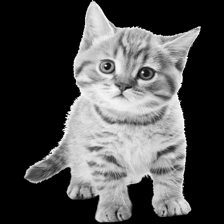

1/1 [==============================] - 2s 2s/step


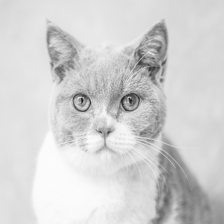

1/1 [==============================] - 0s 100ms/step


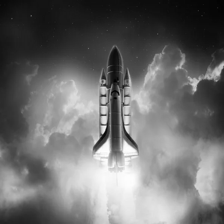

1/1 [==============================] - 0s 88ms/step


In [ ]:
cat1 = extract('./cat1.png')
cat2 = extract('./cat2.jpg')
rocket = extract('./rocket.jpg')

# Distances Images

In [ ]:
from scipy.spatial import distance

In [ ]:
metric = 'cosine'

In [ ]:
dc = distance.cdist([cat1], [cat1], metric)[0]
print(dc)
print("the distance between cat1 and the cat1 is {}".format(dc))

[0.]
the distance between cat1 and the cat1 is [0.]


In [ ]:
dc = distance.cdist([cat1], [cat2], metric)[0]
print(dc)
print("the distance between cat1 and the cat2 is {}".format(dc))

[0.37517998]
the distance between cat1 and the cat2 is [0.37517998]


In [ ]:
dc = distance.cdist([cat1], [rocket], metric)[0]
print(dc)
print("the distance between cat1 and the rocket is {}".format(dc))

[0.84023548]
the distance between cat1 and the rocket is [0.84023548]


In [ ]:
dc = distance.cdist([cat2], [rocket], metric)[0]
print(dc)
print("the distance cat2 original and the rocket is {}".format(dc))

[0.81781548]
the distance cat2 original and the rocket is [0.81781548]


# Embedding Text

In [ ]:
!pip install sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 42.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 30.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 51.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 62.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 27.5 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=f628031bb9c29031c7ad8c44f79bec39cabe86026e3b58cb3ec840f58e444ca7
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


In [ ]:
# https://huggingface.co/blog/sentence-transformers-in-the-hub
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('sentence-t5-base')

In [ ]:
sentence = ['DoiT is a great company to work for']
embedding = model.encode(sentence)
print(len(embedding[0]))
print(embedding[0])

In [ ]:
sentences = ['I spent the day at the medical facility.', #0
            'That a cultured medical genius found her inspiring was beyond flattering.',
            'She drew nearer, eyes sweeping over the medical equipment in the room.',
            'I did not ask the American Medical Association their opinion of this arrangement.',
            'I think the cat wants dessert!', #4
            'Im in no mood to watch a cat fight tonight.', #5
            'The cat would like to eat the mouse.', #6
            'A large grey cat was asleep on a rocking chair.', # 7
            'The pilot was able to land the airplane'] #8

In [ ]:
with open("data.json", "w") as f:
    embedding = model.encode(sentences) # do smaller batches if you do it on large data
    for i in range(len(sentences)):
        f.write('{"id":"' + str(i) + '",')
        f.write('"embedding":[' + ",".join(str(x) for x in embedding[i]) + "]}")
        f.write("\n")

# Google Vertex AI Matching Engine

* February 8th: Updated the code to use the latest version of the SDK and not the beta version anymore. This simplified things a lot as we don't need to work with protobufs anymore.

In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
!gcloud config set project "sascha-playground-doit"

Are you sure you wish to set property [core/project] to sascha-playground-doit?

Do you want to continue (Y/n)?  n



In [ ]:
!pip install google-cloud-aiplatform==1.21.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 24.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.3/321.3 kB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 63.9 MB/s eta 0:00:00
  Attempting uninstall: shapely
    Found existing installation: shapely 2.0.1
    Uninstalling shapely-2.0.1:
      Successfully uninstalled shapely-2.0.1
  Attempting uninstall: packaging
    Found existing installation: packaging 23.1
    Uninstalling packaging-23.1:
      Successfully uninstalled packaging-23.1


In [ ]:
from google.cloud import aiplatform
from google.protobuf import struct_pb2
import time

In [ ]:
aiplatform.init(project="sascha-playground-doit", location="us-central1")

In [ ]:
REGION = "us-central1"
ENDPOINT = "{}-aiplatform.googleapis.com".format(REGION)

PROJECT_ID = "sascha-playground-doit"
PARENT = "projects/{}/locations/{}".format(PROJECT_ID, REGION)

PROJECT_NUMBER = !gcloud projects list --filter="PROJECT_ID:'{PROJECT_ID}'" --format='value(PROJECT_NUMBER)'
PROJECT_NUMBER = PROJECT_NUMBER[0]

In [ ]:
PROJECT_NUMBER

## Copy Embeddings
Copy the embeddings to the Google Cloud Storage bucket

In [ ]:
! gsutil cp data.json gs://doit-vertex-demo/matching-engine/data/text/data.json

## Create VPC Network

In [ ]:
NETWORK_NAME = "matching-engine-vpc-network"
PEERING_RANGE_NAME = "matching-engine-range"

In [ ]:
! gcloud compute networks create {NETWORK_NAME} --bgp-routing-mode=regional

In [ ]:
! gcloud compute firewall-rules create {NETWORK_NAME}-allow-icmp --network {NETWORK_NAME} --priority 65534 --project {PROJECT_ID} --allow icmp
! gcloud compute firewall-rules create {NETWORK_NAME}-allow-internal --network {NETWORK_NAME} --priority 65534 --project {PROJECT_ID} --allow all --source-ranges 10.128.0.0/9
! gcloud compute firewall-rules create {NETWORK_NAME}-allow-rdp --network {NETWORK_NAME} --priority 65534 --project {PROJECT_ID} --allow tcp:3389
! gcloud compute firewall-rules create {NETWORK_NAME}-allow-ssh --network {NETWORK_NAME} --priority 65534 --project {PROJECT_ID} --allow tcp:22


In [ ]:
! gcloud compute addresses create {PEERING_RANGE_NAME} --global --prefix-length=16 --network={NETWORK_NAME} --purpose=VPC_PEERING --project={PROJECT_ID} --description="peering range for uCAIP Haystack."

In [ ]:
!gcloud services enable servicenetworking.googleapis.com --project="sascha-playground-doit"

In [ ]:
! gcloud services vpc-peerings connect --service=servicenetworking.googleapis.com --network={NETWORK_NAME} --ranges={PEERING_RANGE_NAME}

## Create Index

In [ ]:
index = aiplatform.MatchingEngineIndex.create_tree_ah_index(
    display_name="similar_text",
    contents_delta_uri="gs://doit-vertex-demo/matching-engine/data/text/",
    dimensions=768,
    approximate_neighbors_count=150,
    distance_measure_type="DOT_PRODUCT_DISTANCE",
    leaf_node_embedding_count=500,
    leaf_nodes_to_search_percent=7,
    description="Glove 100 ANN index",
    labels={"label_name": "label_value"},
)

In [ ]:
# manually reference the index if it is already existing
INDEX_RESOURCE_NAME = "projects/234439745674/locations/us-central1/indexes/5968580124126216192"
index = aiplatform.MatchingEngineIndex(index_name=INDEX_RESOURCE_NAME)

## List Index

In [ ]:
!gcloud ai indexes list \
  --project="sascha-playground-doit" \
  --region="us-central1"

## Create Index Endpoint

In [ ]:
VPC_NETWORK_NAME = "projects/{}/global/networks/{}".format(PROJECT_NUMBER, NETWORK_NAME)
VPC_NETWORK_NAME

In [ ]:
index_endpoint = aiplatform.MatchingEngineIndexEndpoint.create(
    display_name="index_endpoint_for_demo",
    description="index endpoint description",
    network=VPC_NETWORK_NAME,
)

In [ ]:
#gcloud

!gcloud ai index-endpoints create \
  --display-name="index_endpoint_for_demo" \
  --network="projects/234439745674/global/networks/matching-engine-vpc-network" \
  --project="sascha-playground-doit" \
  --region="us-central1"

## List Endpoints

In [ ]:
!gcloud ai index-endpoints list --project="sascha-playground-doit" --region="us-central1"

## Deploy Index

takes at least 40 min even for the smallest index

In [ ]:
deployed_index = index_endpoint.deploy_index(
    index=index, deployed_index_id="similar_text_index_deployed"
)

In [ ]:
deployed_index.deployed_indexes

In [ ]:
!gcloud ai index-endpoints deploy-index "4732315638133948416" \
  --deployed-index-id="deployed-index-text" \
  --display-name="display name" \
  --index="8291848193616904192" \
  --project="sascha-playground-doit" \
  --region="us-central1"

In [ ]:
!gcloud ai operations describe "5345555672861769728" \
  --index-endpoint="4732315638133948416" \
  --project="sascha-playground-doit" \
  --region="us-central1"

In [ ]:
!gcloud ai index-endpoints describe 8204054389162246144 \
  --project="sascha-playground-doit" \
  --region="us-central1"

In [ ]:
!gcloud ai index-endpoints list --project="sascha-playground-doit" --region="us-central1"

## Query using the SDK (recommended approach)

(IMPORTANT: only works withing the same VPC network. Will not work on your local environment or notebooks outside of the network)

In [ ]:
sentence = ['The cat likes to sleep in the sun']
embedding = model.encode(sentence)
print(embedding[0])

In [ ]:
response = index_endpoint.match(
    deployed_index_id="similar_text_index_deployed",
    queries=[embedding[0]],
    num_neighbors=5
)

response

## Query with gRPC and proto files (deprecated don't use this anymore rather use the SDK)

(IMPORTANT: only works withing the same VPC network. Will not work on your local environment or notebooks outside of the network)

In [ ]:
!pip install grpcio-tools

Create the vector used to query against the matching engine

In [ ]:
sentence = ['The cat likes to sleep in the sun']
embedding = model.encode(sentence)
print(embedding[0])

In [ ]:
!git clone https://github.com/googleapis/googleapis.git

In [ ]:
%%writefile match_service.proto

syntax = "proto3";

package google.cloud.aiplatform.container.v1beta1;

import "google/rpc/status.proto";

// MatchService is a Google managed service for efficient vector similarity
// search at scale.
service MatchService {
  // Returns the nearest neighbors for the query. If it is a sharded
  // deployment, calls the other shards and aggregates the responses.
  rpc Match(MatchRequest) returns (MatchResponse) {}

  // Returns the nearest neighbors for batch queries. If it is a sharded
  // deployment, calls the other shards and aggregates the responses.
  rpc BatchMatch(BatchMatchRequest) returns (BatchMatchResponse) {}
}

// Parameters for a match query.
message MatchRequest {
  // The ID of the DeploydIndex that will serve the request.
  // This MatchRequest is sent to a specific IndexEndpoint of the Control API,
  // as per the IndexEndpoint.network. That IndexEndpoint also has
  // IndexEndpoint.deployed_indexes, and each such index has an
  // DeployedIndex.id field.
  // The value of the field below must equal one of the DeployedIndex.id
  // fields of the IndexEndpoint that is being called for this request.
  string deployed_index_id = 1;

  // The embedding values.
  repeated float float_val = 2;

  // The number of nearest neighbors to be retrieved from database for
  // each query. If not set, will use the default from
  // the service configuration.
  int32 num_neighbors = 3;

  // The list of restricts.
  repeated Namespace restricts = 4;

  // Crowding is a constraint on a neighbor list produced by nearest neighbor
  // search requiring that no more than some value k' of the k neighbors
  // returned have the same value of crowding_attribute.
  // It's used for improving result diversity.
  // This field is the maximum number of matches with the same crowding tag.
  int32 per_crowding_attribute_num_neighbors = 5;

  // The number of neighbors to find via approximate search before
  // exact reordering is performed. If not set, the default value from scam
  // config is used; if set, this value must be > 0.
  int32 approx_num_neighbors = 6;

  // The fraction of the number of leaves to search, set at query time allows
  // user to tune search performance. This value increase result in both search
  // accuracy and latency increase. The value should be between 0.0 and 1.0. If
  // not set or set to 0.0, query uses the default value specified in
  // NearestNeighborSearchConfig.TreeAHConfig.leaf_nodes_to_search_percent.
  int32 leaf_nodes_to_search_percent_override = 7;
}

// Response of a match query.
message MatchResponse {
  message Neighbor {
    // The ids of the matches.
    string id = 1;

    // The distances of the matches.
    double distance = 2;
  }
  // All its neighbors.
  repeated Neighbor neighbor = 1;
}

// Parameters for a batch match query.
message BatchMatchRequest {
  // Batched requests against one index.
  message BatchMatchRequestPerIndex {
    // The ID of the DeploydIndex that will serve the request.
    string deployed_index_id = 1;

    // The requests against the index identified by the above deployed_index_id.
    repeated MatchRequest requests = 2;

    // Selects the optimal batch size to use for low-level batching. Queries
    // within each low level batch are executed sequentially while low level
    // batches are executed in parallel.
    // This field is optional, defaults to 0 if not set. A non-positive number
    // disables low level batching, i.e. all queries are executed sequentially.
    int32 low_level_batch_size = 3;
  }

  // The batch requests grouped by indexes.
  repeated BatchMatchRequestPerIndex requests = 1;
}

// Response of a batch match query.
message BatchMatchResponse {
  // Batched responses for one index.
  message BatchMatchResponsePerIndex {
    // The ID of the DeployedIndex that produced the responses.
    string deployed_index_id = 1;

    // The match responses produced by the index identified by the above
    // deployed_index_id. This field is set only when the query against that
    // index succeed.
    repeated MatchResponse responses = 2;

    // The status of response for the batch query identified by the above
    // deployed_index_id.
    google.rpc.Status status = 3;
  }

  // The batched responses grouped by indexes.
  repeated BatchMatchResponsePerIndex responses = 1;
}

// Namespace specifies the rules for determining the datapoints that are
// eligible for each matching query, overall query is an AND across namespaces.
message Namespace {
  // The string name of the namespace that this proto is specifying,
  // such as "color", "shape", "geo", or "tags".
  string name = 1;

  // The allowed tokens in the namespace.
  repeated string allow_tokens = 2;

  // The denied tokens in the namespace.
  // The denied tokens have exactly the same format as the token fields, but
  // represents a negation. When a token is denied, then matches will be
  // excluded whenever the other datapoint has that token.
  //
  // For example, if a query specifies {color: red, blue, !purple}, then that
  // query will match datapoints that are red or blue, but if those points are
  // also purple, then they will be excluded even if they are red/blue.
  repeated string deny_tokens = 3;
}

In [ ]:
! python -m grpc_tools.protoc -I=. --proto_path=googleapis --python_out=. --grpc_python_out=. match_service.proto

In [ ]:
DEPLOYED_INDEX_SERVER_IP = "10.78.0.5"

import grpc
import match_service_pb2
import match_service_pb2_grpc

channel = grpc.insecure_channel("{}:10000".format(DEPLOYED_INDEX_SERVER_IP))
stub = match_service_pb2_grpc.MatchServiceStub(channel)

In [ ]:
request = match_service_pb2.MatchRequest()
request.deployed_index_id = DEPLOYED_INDEX_ID
for val in embedding[0]:
    request.float_val.append(val)

response = stub.Match(request)
response

## Update Index

In [ ]:
%%writefile metadata.json
{
  "contentsDeltaUri": "gs://doit-vertex-demo/matching-engine/data/text/",
  "isCompleteOverwrite": True,
  "config": {
    "dimensions": 100,
    "approximateNeighborsCount": 150,
    "distanceMeasureType": "DOT_PRODUCT_DISTANCE",
    "algorithm_config": {
      "treeAhConfig": {
      }
    }
  }
}

In [ ]:
!gcloud ai indexes update 8291848193616904192 \
  --metadata-file="./metadata.json" \
  --project="sascha-playground-doit" \
  --region="us-central1"

In [ ]:
!gcloud ai operations describe 3500135356802531328 \
  --index=8291848193616904192 \
  --project="sascha-playground-doit" \
  --region="us-central1"

## Change scaling / mutate

In [ ]:
!gcloud ai index-endpoints mutate-deployed-index 4732315638133948416 \
  --project="sascha-playground-doit" \
  --region="us-central1" \
  --deployed-index-id="deployed-index-text" \
  --min-replica-count=1 \
  --max-replica-count=1

## Undeploy Index

* projects/234439745674/locations/us-central1/indexEndpoints/7097409129945235456

* projects/234439745674/locations/us-central1/indexes/2682051907773530112"

In [ ]:
!gcloud ai index-endpoints list --project="sascha-playground-doit" --region="us-central1"

Using endpoint [https://us-central1-aiplatform.googleapis.com/]
---
createTime: '2023-06-22T12:43:54.003997Z'
description: palm-langchain-document-answering
displayName: palm-langchain-document-answering
etag: AMEw9yM50xjY-r2CTyRpe4DP_v-Daj3Nf4ZZYC8X5_WPko1iPMUajg_wmUUSEu6ZmG9r
name: projects/234439745674/locations/us-central1/indexEndpoints/4797978472544731136
network: projects/234439745674/global/networks/matching-engine-vpc-network
updateTime: '2023-06-22T12:43:54.681063Z'
---
createTime: '2023-06-09T15:11:55.283483Z'
description: catawiki-langchain-document-answering
displayName: catawiki-langchain-document-answering
etag: AMEw9yMYmaByHeD7RKtKk_1PkM7Bfpvq83GSFCVbIfMxzKZk3VNwCGkqTRas1ewn0qQ=
name: projects/234439745674/locations/us-central1/indexEndpoints/4187459248059318272
network: projects/234439745674/global/networks/matching-engine-vpc-network
updateTime: '2023-06-09T15:11:56.042078Z'
---
createTime: '2023-06-08T18:12:58.604542Z'
description: image-similarity-vpc
displayName: i

In [ ]:
!gcloud ai index-endpoints undeploy-index "4299714987208736768" \
  --deployed-index-id="ticket_similarity_deployed_v2" \
  --project="sascha-playground-doit" \
  --region="us-central1"

Using endpoint [https://us-central1-aiplatform.googleapis.com/]
'@type': type.googleapis.com/google.cloud.aiplatform.v1.UndeployIndexResponse


In [ ]:
!gcloud ai indexes list \
  --project="sascha-playground-doit" \
  --region="us-central1"

In [ ]:
!gcloud -q ai indexes delete "projects/234439745674/locations/us-central1/indexes/3621826486266232832" \
  --project="sascha-playground-doit" \
  --region="us-central1"

In [ ]:
!gcloud ai indexes list \
  --project="sascha-playground-doit" \
  --region="us-central1"

In [ ]:
!gcloud ai index-endpoints delete 2514503927886512128 \
  --project="sascha-playground-doit" \
  --region="us-central1" \
  --quiet